<a href="https://colab.research.google.com/github/joew2k/finance_data/blob/main/GWP1ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kurtosis, skewnorm, norm
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from google.colab import drive
import os
drive.mount('/content/drive/')
os.chdir('/content/drive/My Drive/WQ 2023/610 financial econometrics/')

## Kurtosis
### **Definition**

Kurtosis is a measure of describing how heavy the tails of a distribution deviate from the tails of a Gaussian distribution. For sample statistics, the kurtosis can be estimated as follows



$K = \frac{\left(\sum_{i=1}^n (x_i - \bar{x})^4\right)/n}{s^4} - 3$

Where
${\left(\sum_{i=1}^n (x_i - \bar{x})^4\right)/n}$ is the fourth moment

and ${s}$ is the sample standard deviation

From the above, If the kurtosis is positive, it indicates heavy tails, and a negative value indicates that there are light tails. Comparing the shape of the tail with the normal distribution suggests if the distribution is a heavy tail or a light tail. The kurtosis of a standard normal distribution is 3.0.
Basically, there are three categories of Kurtosis.
1.	Mesokurtic which is like the bell curve of a normal distribution.
2.	Leptokurtic distribution if the Kurtosis is greater than the mesokurtic distribution.
3.	Platykurtic distribution which is less than the mesokurtic distribution.

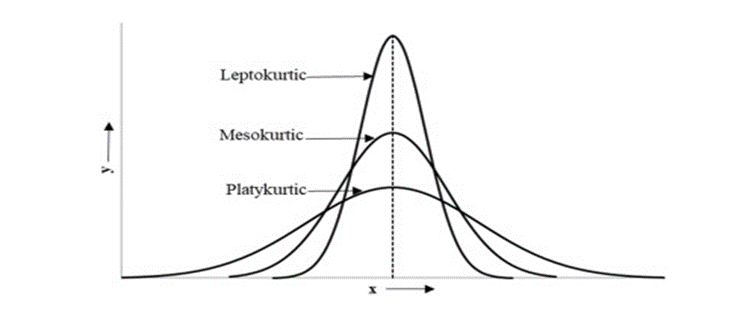

### **Description**


Measures of Kurtosis help identify if a curve is normal or abnormally shaped (Megan, 2013). Datasets with high levels of Kurtosis usually have unique peaks near the mean, decline rapidly, and have heavy tails. On the other hand, datasets with low Kurtosis usually have a flat top near the mean instead of a sharp peak.

The primary factor that determines the peakiness of the distribution is the level of degree of freedom, distributions can have the same mean, standard deviations, and the same degree of skewness. Skewness and Kurtosis can help identify the presence of outliers in datasets. If the empirical distribution has a high amount of kurtosis that might be a clue that we should look and see if that is driven by one or more outliers (Chris 2022)

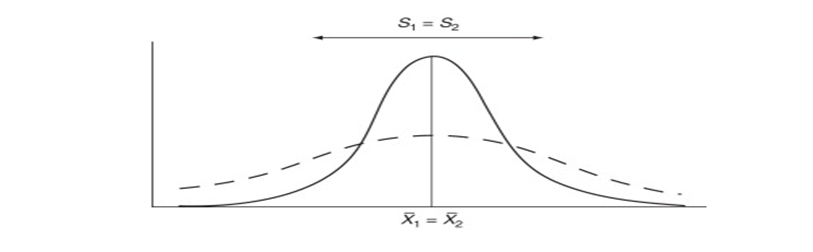

### **Demonstration**:

For demonstration purposes, we will use the META( formerly Facebook) daily returns data to show the presence of kurtosis). Determining Kurtosis can simply be derived using the descriptive statistics of the **stats** library, which returns the excess kurtosis. To get the real Kurtosis we have to add three to the derived Kurtosis


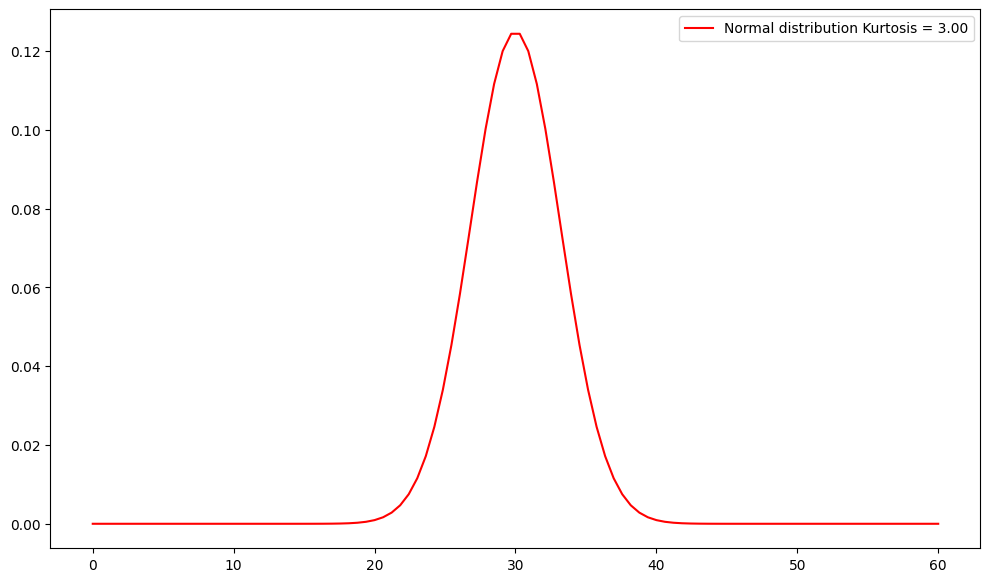

In [ ]:
# Normal distribution using normal randomly generated data
x = np.linspace(0, 60, 100)
y = stats.norm.pdf(x, loc = 30, scale = 3.194 )
plt.figure(figsize=(12,7))
plt.plot(x, y, c='r', label='Normal distribution Kurtosis = {:.2f}'.format(kurtosis(y)))
plt.legend()
plt.show();

In [ ]:
# Download TSLA data from Yahoo
start_date = '2018-01-01'
end_date = '2023-12-31'
TSLA_close = pdr.get_data_yahoo('TSLA', start=start_date, end=end_date)['Adj Close']
TSLA_return = round(np.log(TSLA_close).diff() * 100, 2)
TSLA_return.dropna(inplace=True)


[*********************100%%**********************]  1 of 1 completed


In [ ]:
n, minmax, mean, var, skew, kurt = stats.describe(TSLA_return)
mini, maxi = minmax
std = var ** .5
print("TSLA Excess Kurtosis {:.2f}".format(kurt))

TSLA Excess Kurtosis 3.56


### **Diagram**

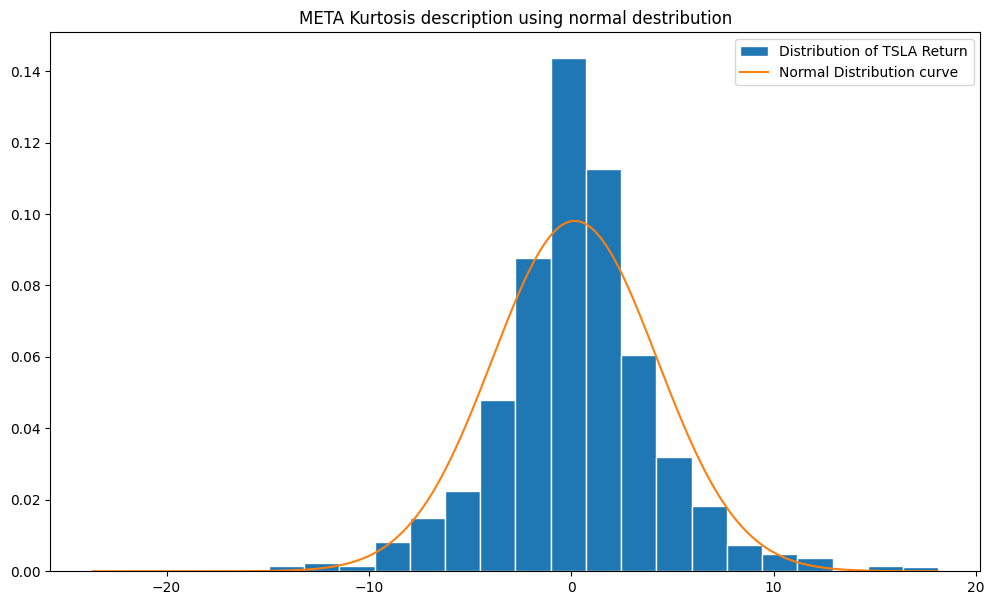

In [ ]:
plt.figure(figsize=(12,7))
plt.hist(TSLA_return, bins = 24, edgecolor='w', density=True, label="Distribution of TSLA Return")
overlay = np.linspace(mini, maxi, n)
plt.plot(overlay, norm.pdf(overlay, mean, std), label="Normal Distribution curve")
plt.title("META Kurtosis description using normal destribution")
plt.legend()
plt.show();


### **Diagnosis:**
There are several tests used to recognize kurtosis is a sample, A simple method is using the **stats.kurtosistest** in python **stats** library. if the *p* value is less than $0.05$ The data is not normal distributed, we will also compare the value of the excess kurtosis with the normal kurtosis of $3.0$ to know if the distribution is Leptokurtic, Mesokurtic or Platykurtic

From the code below, it can be observed that the *p* value is less than 0.05 which indicates that our distribution for TSLA is not normerlly distributed


In [ ]:
x = norm.rvs(mean, std, n)
x_test = stats.kurtosistest(x)
TSLA_test = stats.kurtosistest(TSLA_return)
print(f'{"    Test statistic":20}{"p-value":>15}')
print(f'{" "*5}{"-"* 30}')
print(f"x:{x_test[0]:>17.2f}{x_test[0]:16.4f}")
print(f"META:{TSLA_test[0]:>17.2f}{TSLA_test[1]:16.4f}")


    Test statistic          p-value
     ------------------------------
x:             0.45          0.4491
META:            11.11          0.0000


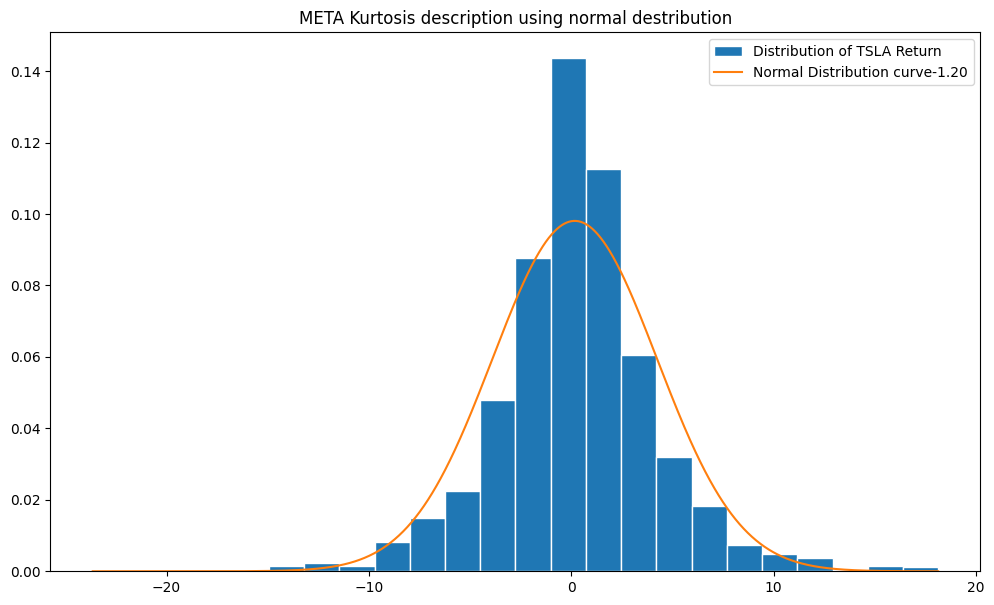

In [ ]:
plt.figure(figsize=(12,7))
plt.hist(TSLA_return, bins = 24, edgecolor='w', density=True, label="Distribution of TSLA Return")
overlay = np.linspace(mini, maxi, n)
plt.plot(overlay, norm.pdf(overlay, mean, std), label="Normal Distribution curve")
plt.title("META Kurtosis description using normal destribution")
plt.legend()
plt.show();


### **Damage**
Kurtosis can cause problems when modeling time series. Kurtosis can lead to inaccurate forecasts. Inaccurate forecasts can lead to losses for the business.
For example, if we forecast that the price of an asset will go up, but the actual price goes down, the business will lose money.


### **Direction**

To address the challenges with Kurtosuis in modeling our data, we can use different models that account for these features, We can use models that allow for non-normal distributions such as t-distributions, skewed directions or mixture distributions.

## Non-Sationary
### **Definition**
A non-stationary time series is a time series whose attributes change over time.

In [ ]:
path = 'AAPL.csv'
df = pd.read_csv(path)

df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
df = df.loc[(df['Date']  >='2020-01-01')]
df = df.set_index('Date')

df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785912,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068565,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650795,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483620,132079200
...,...,...,...,...,...,...
2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000


###Diagram
Open prices throught out days is an example of non-stationary time series

([<matplotlib.axis.XTick at 0x795f974a3af0>,
 [Text(103.0, 0, '2020-06-01'),
  Text(355.0, 0, '2021-06-01'),
  Text(608.0, 0, '2022-06-01')])

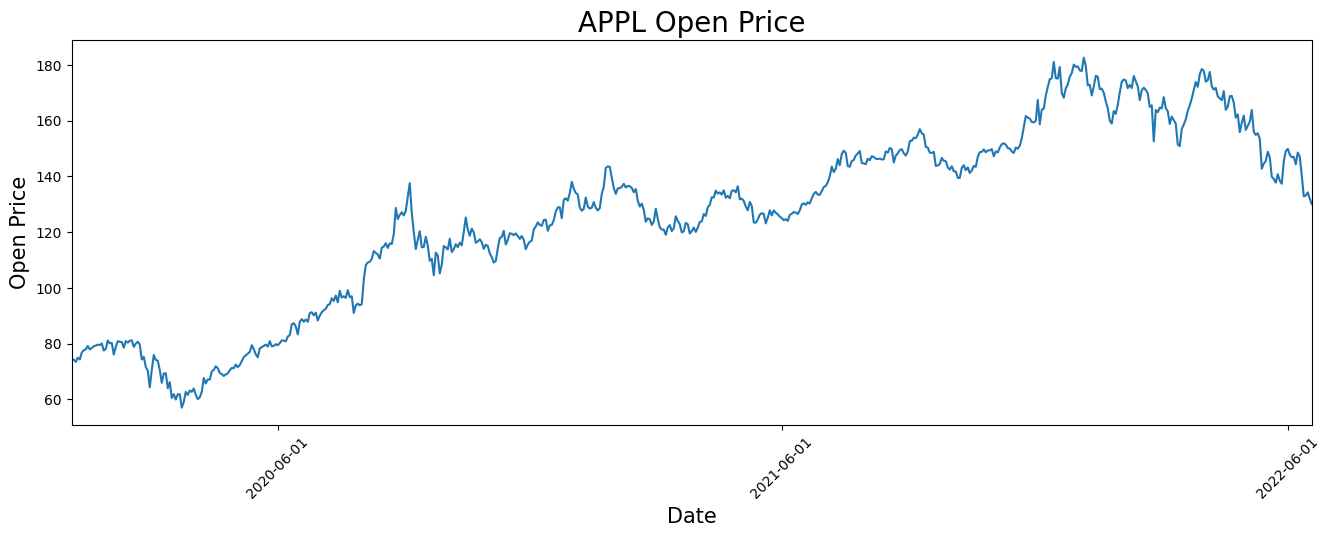

In [ ]:
#plt.plot(df.index, df['Open'])

fig = plt.subplots(figsize=(16, 5))
plt.plot(df.index, df['Open'])
plt.title('APPL Open Price', fontsize=20)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Open Price', fontsize=15)
plt.xlim(df.index.min(), df.index.max())

# Defining and displaying time axis ticks
ticks = ['2020-06-01', '2021-06-01', '2022-06-01']
plt.xticks(ticks, rotation=45)



In [ ]:
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [ ]:
adf_test(df['Open'])

Results of Dickey-Fuller Test:
Test Statistic                  -1.670451
p-value                          0.446398
#Lags Used                       2.000000
Number of Observations Used    618.000000
Critical Value (1%)             -3.440976
Critical Value (5%)             -2.866228
Critical Value (10%)            -2.569267
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import kpss

In [ ]:
def kpss_test(timeseries):
    print ('Results of KPSS Test:')
    kpsstest = kpss(timeseries, regression='c', nlags="auto")
    kpss_output = pd.Series(kpsstest[0:3], index=['Test Statistic','p-value','#Lags Used'])
    for key,value in kpsstest[3].items():
        kpss_output['Critical Value (%s)'%key] = value
    print (kpss_output)

In [ ]:
kpss_test(df['Open'])

Results of KPSS Test:
Test Statistic            3.281899
p-value                   0.010000
#Lags Used               16.000000
Critical Value (10%)      0.347000
Critical Value (5%)       0.463000
Critical Value (2.5%)     0.574000
Critical Value (1%)       0.739000
dtype: float64


<ipython-input-29-aec3ac3c5ed4>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpsstest = kpss(timeseries, regression='c', nlags="auto")


#Sensitive to Outlier
###Definition
Outliers are data point significantly different from others they can be unusually small
or unusually large data value. An outlier may be a value that has been incorrectly
recorded, and does not fit the trend shown by the remaining data. Sensitivity to
outliers arises when they disproportionately impact statistical estimates.
###Description
Outlier is an observation that is unusual in comparison with the other data, hence they
do not fit the pattern of the other data
###Demonstration
Real-world data: Apple Stock Price from 1980-2021, including open price, high price, low price, close price, and volume trading of each day. The data was collected from Kaggle which was originally from Yahoo Finance.


###Diagram

In [ ]:
df.reset_index()
df.reindex(index=range(0,621))

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,74.059998,75.150002,73.797501,75.087502,73.785912,135480400
1,2020-01-03,74.287498,75.144997,74.125000,74.357498,73.068565,146322800
2,2020-01-06,73.447502,74.989998,73.187500,74.949997,73.650795,118387200
3,2020-01-07,74.959999,75.224998,74.370003,74.597504,73.304413,108872000
4,2020-01-08,74.290001,76.110001,74.290001,75.797501,74.483620,132079200
...,...,...,...,...,...,...,...
616,2022-06-13,132.869995,135.199997,131.440002,131.880005,131.880005,122207100
617,2022-06-14,133.130005,133.889999,131.479996,132.759995,132.759995,84784300
618,2022-06-15,134.289993,137.339996,132.160004,135.429993,135.429993,91533000
619,2022-06-16,132.080002,132.389999,129.039993,130.059998,130.059998,108123900


([<matplotlib.axis.YTick at 0x795f8f5196f0>,
 [Text(0, 103.0, '2020-06-01'),
  Text(0, 355.0, '2021-06-01'),
  Text(0, 608.0, '2022-06-01')])

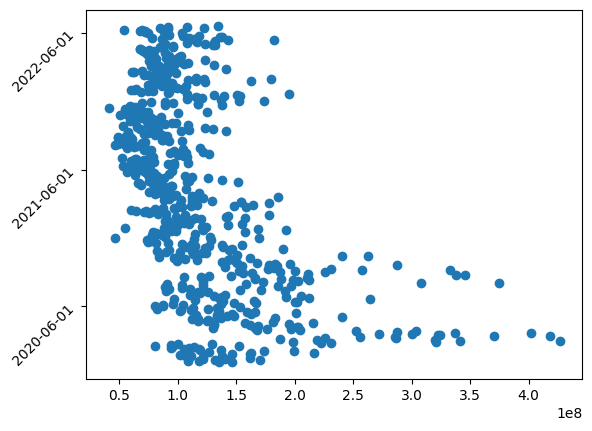

In [ ]:
x = df['Volume']
y = df['Date']

plt.scatter(x, y)

#plt.show()

ticks = ['2020-06-01', '2021-06-01', '2022-06-01']
plt.yticks(ticks, rotation=45)


###Diagnosis
Detecting the problem of sensitivity to outliers involves identifying whether extreme data points significantly affect the statistical measures or results of one analysis, one can visually inspect the data set using a scatter plot, box plot or histogram to observe the distribution and identify any potential outlier. Cook’s distance can also help detect influential points in regression analysis.

###Damage
Although outliers may not always be errors or anomalies they could represent genuine but rare occurrences. They can influence the mean as well as standard deviation thereby misleading the analyst into forming incorrect assumptions it can cause skewness as well as disrupt model fitting and incorrect assumptions.

     
###Directions
In order to mitigate the problem of sensitivity to outliers one can result into using robust estimators of volatility such as Median Absolute Deviation (MAD), Winsorized estimators, Huber’s M estimator


# SKEWNESS

**Definition**

This is a measure of the asymmetry of a distribution. A distribution is defined as an asymmetric when the left and right sides are not mirror images of each other. Hence, such a distribution is stretched more to one side than to the other. Using Pearson’s median skewness, we can calculate skewness using the formula below
Pearson’s median skewness = 3 * (mean-median)/standard deviation.


**Description**

A frequency distribution for which the curve has a longer tail to the right is said to be positively skewed and if the longer tail lies to the left, it is said to be negatively skewed.


**Demonstration**

The following two randomly generated numerical examples are simulated data that address the problem of skewness showing positively skewed and negatively skewed data.

**Positively Skewed Simulated data**: [8.27416926, 2.36908904, 4.30311325, 3.83371464, 4.89099829, 5.0350563, 2.46129156, 3.05300892, 2.38480606, 2.41127924, 5.34525133, 2.63857733, 4.96370111, 3.49703023, 6.1690712, 4.60036595, 6.28693246, 3.21693485, 3.50295417, 2.28788379]. The skewness for this data is 0.94

**Negatively Skewed Simulated data**: [ -3.99419089, -5.07057555, -3.49496112, -4.16714853,
-3.55762961, -2.41119118, -1.72402005, -6.73849582, -5.22180079, -9.44718243, -11.21442261, -2.91389327, -7.9750296, -6.46258694, -3.07856563, -2.52935024, -3.48906492, -3.55483201,
-1.7201655, -3.20041563]. The skewness for this data is -1.3


**Diagram**

**POSITIVELY SKEWED DATA**

Generate positively skewed data mean = 2 std_dev = 0.5 size = 20

pos_skew=np.random.normal(loc=mean, scale=std_dev, size=size)**2 print(pos_skew)

The data was randomly generated using the above code.

In [ ]:
#calculating the skewness

pos_skew = [8.27416926, 2.36908904, 4.30311325, 3.83371464, 4.89099829, 5.0350563,
 2.46129156, 3.05300892, 2.38480606, 2.41127924, 5.34525133, 2.63857733,
 4.96370111, 3.49703023, 6.1690712,  4.60036595, 6.28693246, 3.21693485,
 3.50295417, 2.28788379]
df=pd.DataFrame(pos_skew, columns=["pos_skew"])
skewness = df["pos_skew"].skew()
maximum = df["pos_skew"].max()
minimum = df["pos_skew"].min()
standard_dev = df["pos_skew"].std()
mean_pos = df["pos_skew"].mean()

print("THE SKEWNESS OF THE DATA IS " + str(round(skewness, 2)))

THE SKEWNESS OF THE DATA IS 0.94


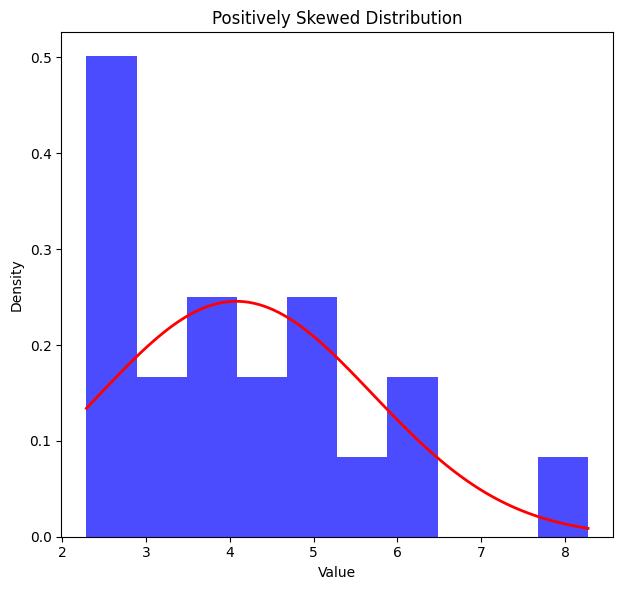

In [ ]:
# Create histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df, bins=10, density=True, color='blue', alpha=0.7)
plt.title('Positively Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Density')


# Add normal curve to positively skewed distribution
x_range_pos = np.linspace(minimum, maximum, 100)
normal_curve_pos = stats.norm.pdf(x_range_pos, loc=mean_pos, scale=standard_dev)
plt.plot(x_range_pos, normal_curve_pos, 'r', linewidth=2)

plt.tight_layout()
plt.show()

**NEGATIVELY SKEWED DATA**

Generate negatively skewed data
mean = 2
std_dev = 0.5
size = 20

neg_skew=-np.random.normal(loc=mean, scale=std_dev, size=size)**2
print(neg_skew)


In [ ]:
#calculating the skewness

neg_skew = [ -3.99419089,  -5.07057555,  -3.49496112,  -4.16714853,  -3.55762961,
  -2.41119118,  -1.72402005,  -6.73849582,  -5.22180079,  -9.44718243,
 -11.21442261,  -2.91389327,  -7.9750296,   -6.46258694,  -3.07856563,
  -2.52935024,  -3.48906492,  -3.55483201,  -1.7201655,   -3.20041563]

df=pd.DataFrame(neg_skew, columns=["neg_skew"])
skewness = df["neg_skew"].skew()
maximum = df["neg_skew"].max()
minimum = df["neg_skew"].min()
standard_dev = df["neg_skew"].std()
mean_pos = df["neg_skew"].mean()

print("THE SKEWNESS OF THE DATA IS " + str(round(skewness, 2)))

THE SKEWNESS OF THE DATA IS -1.3


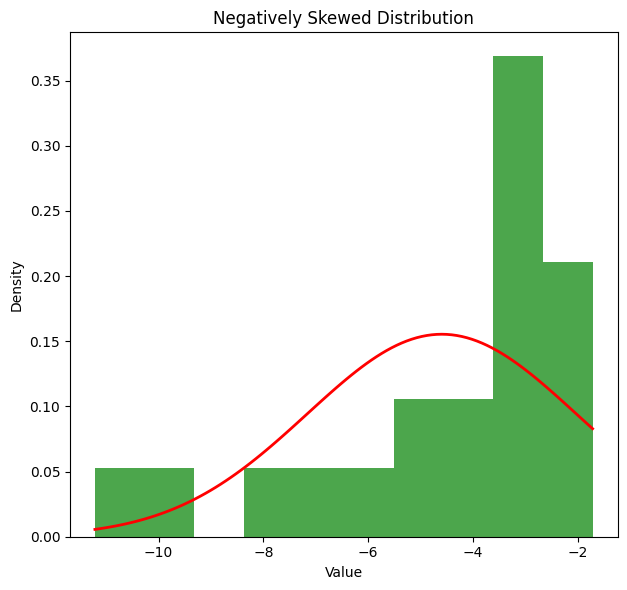

In [ ]:
# Create histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df, bins=10, density=True, color='green', alpha=0.7)
plt.title('Negatively Skewed Distribution')
plt.xlabel('Value')
plt.ylabel('Density')


# Add normal curve to negatively skewed distribution
x_range_pos = np.linspace(minimum, maximum, 100)
normal_curve_pos = stats.norm.pdf(x_range_pos, loc=mean_pos, scale=standard_dev)
plt.plot(x_range_pos, normal_curve_pos, 'r', linewidth=2)

plt.tight_layout()
plt.show()

**Diagnosis**

To determine if a distribution is skewed, one can result into using Pearson’s median skewness to calculate the skewness of the data if the resulting value is positive, the data is positively skewed or skewed to the right, if the value yields a negative answer, then the result is negatively skewed or skewed to the left. One can also draw visuals to inspect the skewness of the distribution as done above.


**Damage**

Neglecting skewness can lead to erroneous assumptions about the distribution symmetry thereby affecting volatility modeling accuracy and in turn degrading the model’s ability as it has to deal with extreme values. A positively skewed data has more value to the left of the mean and the most extreme values are to the right causing inaccurate volatility estimation.

**Directions**

In order to mitigate the effect of skewness on a distribution, one can resort to using non-parametric models that transform the data.  Box and Cox, transformation, student’s t distribution as well and skewed generalized error distribution can all address the problem of skewness

